# Chapter 5: Demo KNN Classisfication

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

In [ ]:
# %cd '/content/gdrive/My Drive/LDS6_MachineLearning/practice/Chapter5_KNN/'

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key:
experiment = Experiment(
    api_key="8USiekuMIwf0zJtXpZaAPBKSC",
    project_name="iris-project",
    workspace="phuongfanta",
)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [25]:
iris = pd.read_excel("Iris.xls")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = [iris_class[i] for i in iris.iris]
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [28]:
def make_color(value):
    color = 'yellow'
    if value == 0:
        color = 'red'
    elif value == 1:
        color = 'green'
    else:
        color = 'blue'
    return color

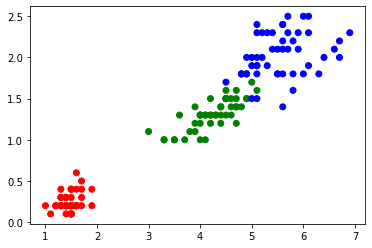

In [30]:
pentallength = iris.petallength.values
petalwidth = iris.petalwidth.values
types = iris.species_num.values
color= [make_color(x) for x in types]
plt.scatter(pentallength, petalwidth, color=color)
plt.show()

In [31]:
import seaborn as sns

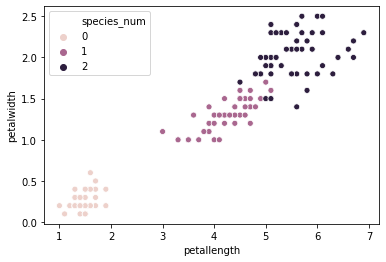

In [32]:
sns.scatterplot(x="petallength", y="petalwidth", data=iris,hue="species_num")
plt.show()

In [33]:
X = iris.drop(['iris', 'species_num'], axis=1) # input: cac thuoc tinh lien tuc 
y = iris.species_num # output: class

In [34]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [38]:
list_k = []
list_acc = []
# list_score_train
# list_score_test
# |train - test| <<
for K_value in range(2,9):        
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100 
    # model.score(X_train, y_train) & model.score(X_test,y_test)
    # ... |train - test| <<
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",
          K_value)
    
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]

print("\nThe optimal number of neighbors is %d with %0.1f%%" % (k, 
                                                  list_acc[vi_tri]))
# chạy nhiều lần, thấy k nào có độ chính xác cao và ít biến động nhất thì chọn

Accuracy is  100.0 % for K-Value: 2
Accuracy is  100.0 % for K-Value: 3
Accuracy is  100.0 % for K-Value: 4
Accuracy is  100.0 % for K-Value: 5
Accuracy is  100.0 % for K-Value: 6
Accuracy is  96.66666666666667 % for K-Value: 7
Accuracy is  100.0 % for K-Value: 8

The optimal number of neighbors is 2 with 100.0%


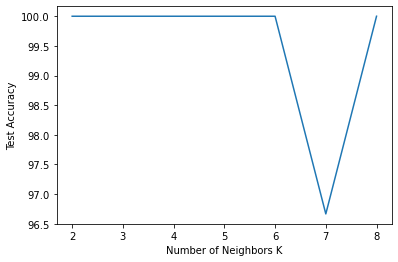

In [39]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [40]:
# select k => ap dung model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [41]:
y_pred = knn.predict(X_test)

In [42]:
# Kiểm tra độ chính xác
print("The prediction accuracy is: ", knn.score(X_test,y_test)*100,"%")

The prediction accuracy is:  100.0 %


In [47]:
print("The Training R^2 score is: ", knn.score(X_train,y_train))
print("The Testing R^2 score is: ", knn.score(X_test,y_test))

The Training R^2 score is:  0.9666666666666667
The Testing R^2 score is:  1.0


In [48]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [49]:
x_now = [[4.8, 3.3, 1.6, 0.25]]
y_now = knn.predict(x_now)
y_now

array([0], dtype=int64)

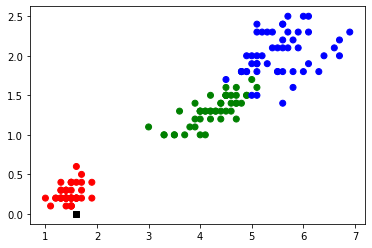

In [50]:
types = iris.species_num.values
color= [make_color(x) for x in types]
plt.scatter(pentallength, petalwidth, color=color)
plt.scatter(x_now[0][2], y_now, color='k', marker = 's')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("F1 score is {:6.3f}".format(f1))
print("Precision score is {:6.3f}".format(precision))
print("Recall score is {:6.3f}".format(recall))

#these will be logged to your sklearn-demos project on Comet.ml
params={"random_state":42,
        "model_type":"logreg",
        "scaler":"standard scaler",      
        "stratify":True
}

metrics = {"f1":f1,
"recall":recall,
"precision":precision
}

experiment.log_dataset_hash(X_train)
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
from comet_ml import ConfusionMatrix

In [ ]:
cm = ConfusionMatrix()
cm.compute_matrix(y_test.to_list(), y_pred.tolist())

experiment.log_confusion_matrix(matrix=cm)